   States  Seek  Number 2
0      AL   1.0         1
1      AZ   1.0         1
2      CA   1.0        43
3      CO   1.0         2
4      CT   1.0         1
5      DC   1.0         1
6      FL   1.0         4
7      GA   1.0         5
8      IL   1.0         7
9      IN   1.0         6
10     KY   1.0         1
11     MA   1.0         2
12     MI   1.0         2
13     MN   1.0         5
14     MO   1.0         1
15     NC   1.0         3
16     NE   1.0         1
17     NH   1.0         1
18     NJ   1.0         1
19     NY   1.0        16
20     OH   1.0         5
21     OK   1.0         1
22     OR   1.0        12
23     PA   1.0         7
24     SC   1.0         1
25     SD   1.0         2
26     TN   1.0         9
27     TX   1.0         6
28     UT   1.0         4
29     VA   1.0         4
30     WA   1.0        28
31     WI   1.0         5
   States  Treatment  Number 1
0      AL          1         7
1      AZ          1         6
2      CA          1        86
3      CO         

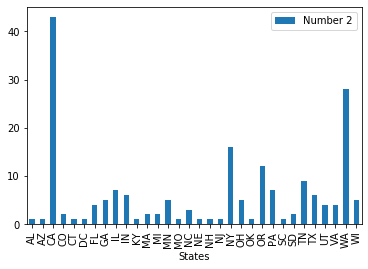

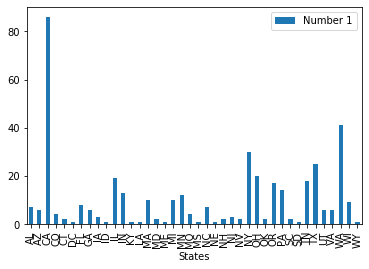

In [12]:
# Import Libraries
import pandas as pd
import matplotlib as plt
%matplotlib inline

# Read CSV and store in two different dataframes
df = pd.read_csv('survey.csv')
fd = pd.read_csv('survey.csv')
# Print first five values to see the whole dataset
print(df.head())
print(fd.head())

# Rename seek_help Categorical values to Numerical values for smoother filtering
df["seek_help"] = df["seek_help"].replace(["Yes", "Don't know", "No"], [1, 0.5, 0])
df = df[df.seek_help==1]

fd["treatment"] = fd["treatment"].replace(["Yes", "No"], [1, 0]) 
fd = fd[fd.treatment==1]

# Filtering out null values from the column 'state' and selected the country as USA
df = df[df['state'].notnull()]
df = df[df.Country=='United States']

fd = fd[fd['state'].notnull()]
fd = fd[fd.Country=='United States']


# Selecting values where employer provide resources to learn more about mental health issues and how to seek help
seekhelp_df = df.groupby(['state', 'seek_help']).size().reset_index()
seekhelp_df.columns = ["States", "Seek", "Number 2"]
print(seekhelp_df)

treatment_fd = fd.groupby(['state', 'treatment']).size().reset_index()
treatment_fd.columns = ["States", "Treatment", "Number 1"]
print(treatment_fd)

# Plotting both values on a bar graph for comparing and correlation
seekhelp_df.plot.bar(x='States',y='Number 2')

treatment_fd.plot.bar(x='States',y='Number 1')
